In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

## Assignment:

Your turn: 

So far we worked on the HPD data. 

We will now divide into groups, when each group will look into another agency complaints: 

# Group 1: NYPD
# Group 2: DOT 
# Group 3: DEP 
# Group 4: DSNY 
# Group 5: DOHMH 

For each groups: 

1. Please filter the subset of the data that has *YOUR* Agencey name
2. Plot, summarize and group.by the data for both 2019 and 2020 
 
Deliver:  
- a. What are the patterns in *YOUR* agency complaints between the 2019 and 2020 data? 
- b. What are some geogrpaphical patterns you are seeing comparing both years?

In class: present your main findings. For you homework: submit your jupyter notebook. In addition on your NYU classes submissions write a short summary of your findings. 

Due: April 27th 2020 before class.

In [3]:
#load 311 data 1 for this year and one for last year: 

data20 = pd.read_csv('311_March_April2020.csv')

#load 2019 data 

data19 = pd.read_csv('311_March-April2019.csv')

/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/aberais/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:

data19 = data19.loc[data19['Agency']=='NYPD']
data20 = data20.loc[data20['Agency']=='NYPD']

In [2]:
import pandas as pd

In [21]:
data19['Agency'].unique()

array(['DEP', 'DOHMH', 'HPD', 'NYPD', 'DSNY', 'DOT', 'DOB', 'TLC', 'EDC',
       'DPR', 'DFTA', 'HRA', 'DCA', 'DOF', 'DHS', 'DOITT', 'DCAS', 'DOE',
       'TAX', 'ACS', 'TAT', 'DCP', 'NYCEM'], dtype=object)

In [24]:
data19.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
132,41941914,03/13/2019 12:01:24 AM,03/13/2019 07:30:53 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11432,89-16 175 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710265,-73.786963,"(40.71026502333504, -73.78696271933079)"


In [25]:
#transform data into geo data frame: 

gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

gdf19 = gpd.GeoDataFrame(
    data19, geometry=gpd.points_from_xy(data19.Longitude, data19.Latitude))

#note that here we tell Python that the column: 
#data20.Longitude is the longtitute and data20.Latitude is the latitude. 

In [26]:
#filter only hpd

hpd19 = gdf19.loc[gdf19['Agency']=='NYPD']
hpd20 = gdf20.loc[gdf20['Agency']=='NYPD']

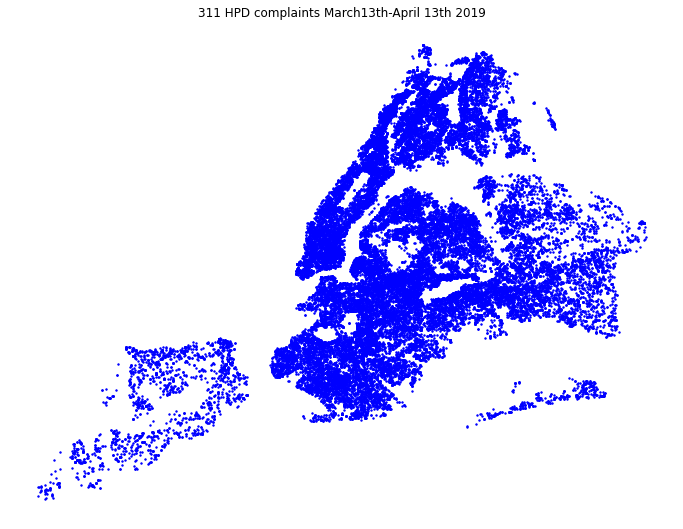

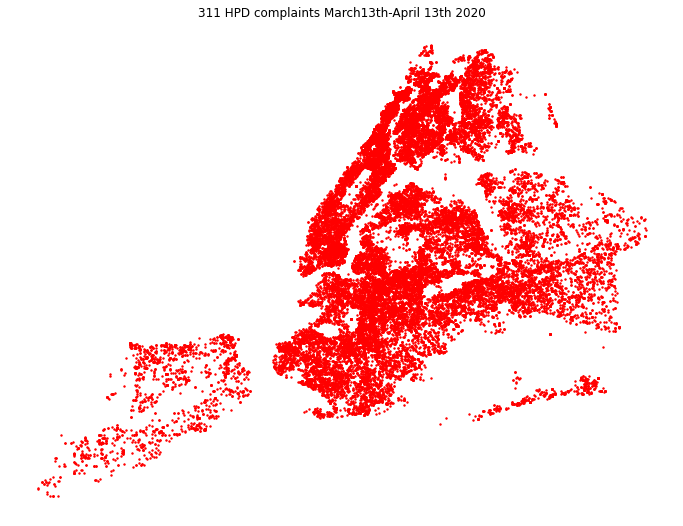

In [27]:
hpd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2019')
hpd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2020')
plt.show()

In [ ]:
# I will breakdown the patterns I notice based on each borough 

# Staten Island: From 2019 to 2020, there is approximately the same number of complaints

# Brooklyn: In 2020, there is less complaints in the regions south of Prospect Park. 
# Prospect Park is represented by the two large non colored sections of the Brooklyn Area
# There is also a slightly smaller number of cases in the Downtown Brooklyn area. 


# Queens: In 2020, there seems to be a smaller amount of complaints, no notable differences in any region

# Bronx: In 2020, there is a larger amount of complaints in areas that did not have any complaints in 2019


# Manhattan: In 2020, there are less complaints in Downtown Manhattan and Midtown.  


# In general, there are patterns of complaints in most commercial and residential areas of NYC. 
# The areas that do not have complaints or very little are parks and bodies of water in NYC. 
